## First Attempt at Predicting Salary

For the last two questions regarding what are related to relationships of variables with **salary and job satisfaction** - Each of these questions will involve not only building some sort of predictive model, but also finding and interpretting the influential components of whatever model we build.

To get started let's read in the necessary libraries and take a look at some of our columns of interest.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model prediction
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import WhatHappened as t

In [4]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# look at continious variable
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [6]:
df.shape

#number of respondent

(51392, 154)

## Question 1

1. Use the above to match each variable (a, b, c, d, e, or f) as the appropriate key that describes the value in the desc_sol dictionary.


In [38]:
a = 40
b = 'HoursPerWeek'
c = 'Salary'
d = 'Respondent'
e = 10
f = 'ExpectedSalary'

desc_sol = {'A column just listing an index for each row':d,
       'The maximum Satisfaction on the scales for the survey': e,
       'The column with the most missing values':f,  
       'The variable with the highest spread of values':c}

# 'The maximum Satisfaction on the scales for the survey': e, # CareerSatisfaction	JobSatisfaction	StackOverflowSatisfaction
   #    'The column with the most missing values':f,  # you can see from the count
    #   'The variable with the highest spread of values':c# highest std}

In [39]:
t.describe_check(desc_sol)

Nice job that looks right!


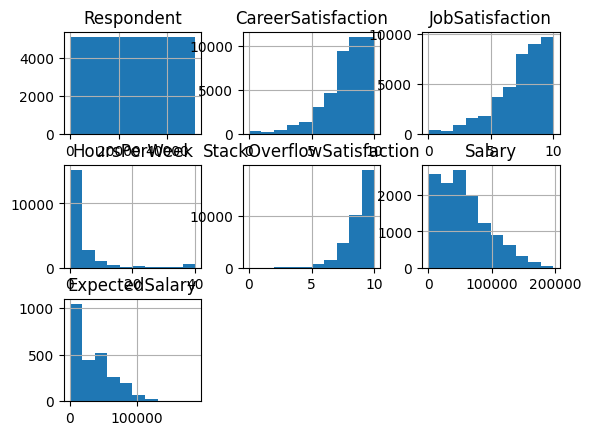

In [9]:
df.hist();

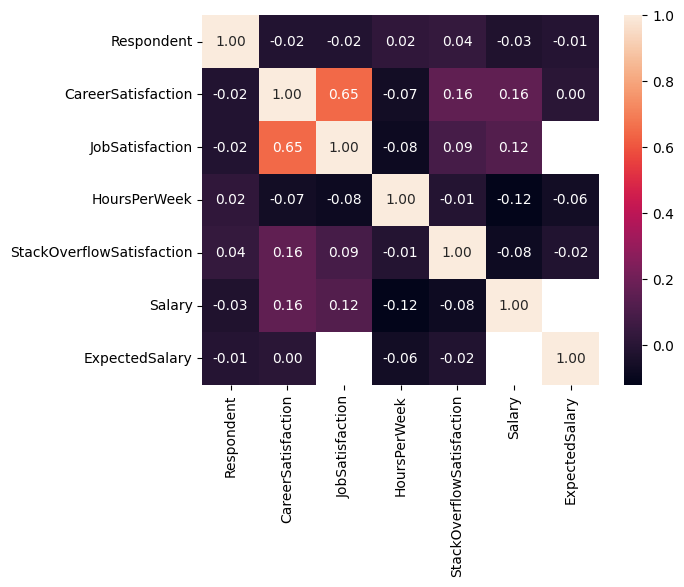

In [13]:
sns.heatmap(df.corr(numeric_only=True),annot=True, fmt ='.2f');

# darker color less correlation

## Question 2

2. Use the scatterplot matrix above to match each variable (a, b, c, d, e, f, or g) as the appropriate key that describes the value in the scatter_sol dictionary.

In [35]:
a = 0.65
b = -0.01
c = 'ExpectedSalary'
d = 'No'
e = 'Yes'
f = 'CareerSatisfaction'
g = -0.15

scatter_sol = {
    'The column with the strongest correlation with Salary': f,
    'The data suggests more hours worked relates to higher salary': d,
    'Data in the ______ column meant missing data in three other columns': e,
    'The strongest negative relationship had what correlation?': g
}

t.scatter_check(scatter_sol)


Oops! No, that is not the column with the strongest correlation with salary.
Oops! Actually, which column has two other columns with missing data when it is filled - your answer doesn't look like what I was expecting.


# Define X, y Variable

In [18]:
X = df[['CareerSatisfaction','JobSatisfaction','HoursPerWeek','StackOverflowSatisfaction']] #use these 4 to predict salary
y = df ['Salary']

# Split the data 

In [20]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=.3 , random_state = 42)

In [ ]:
# Instantiate model
# fit training
# Predict test data
# Score your model on the test

# Instantiate Model

In [28]:
lm_model = LinearRegression(normalize= True) # input features have similar scale

In [30]:
X.head()

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction
0,NaN,NaN,0.0,9.0
1,NaN,NaN,NaN,8.0
2,8.0,9.0,NaN,8.0
3,6.0,3.0,5.0,10.0
4,6.0,8.0,NaN,NaN


In [29]:
lm_model.fit(X_train, y_train) # fit the training data 

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Question 3

3. Use the results above to match each variable (a, b, c, d, e, or f) as the appropriate key that describes the value in the lm_fit_sol dictionary.

In [40]:
a = 'it is a way to assure your model extends well to new data'
b = 'it assures the same train and test split will occur for different users'
c = 'there is no correct match of this question'
d = 'sklearn fit methods cannot accept NAN values'
e = 'it is just a convention people do that will likely go away soon'
f = 'python just breaks for no reason sometimes'

lm_fit_sol = {'What is the reason that the fit method broke?': d,
       'What does the random_state parameter do for the train_test_split function?': b,
       'What is the purpose of creating a train test split?': a}

t.lm_fit_check(lm_fit_sol)

Nice job that looks right!
